In [1]:
import numpy as np 
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.patches as mpatches

import calendar

# Carga de Datos

In [2]:
ssem_2014 = pd.read_csv('properties/properati-AR-2015-01-01-properties-sell-six_months.csv')

psem_2015 = pd.read_csv('properties/properati-AR-2015-06-01-properties-sell-six_months.csv')
ssem_2015 = pd.read_csv('properties/properati-AR-2015-12-01-properties-sell-six_months.csv')

#en_16 = pd.read_csv('properties/properati-AR-2016-01-01-properties-sell.csv')
#fe_16 = pd.read_csv('properties/properati-AR-2016-02-01-properties-sell.csv')
#ma_16 = pd.read_csv('properties/properati-AR-2016-03-01-properties-sell.csv')
#ab_16 = pd.read_csv('properties/properati-AR-2016-04-01-properties-sell.csv')
#my_16 = pd.read_csv('properties/properati-AR-2016-05-01-properties-sell.csv')
#jn_16 = pd.read_csv('properties/properati-AR-2016-06-01-properties-sell.csv')
#jl_16 = pd.read_csv('properties/properati-AR-2016-07-01-properties-sell.csv')
#ag_16 = pd.read_csv('properties/properati-AR-2016-08-01-properties-sell.csv')
#se_16 = pd.read_csv('properties/properati-AR-2016-09-01-properties-sell.csv')
#oc_16 = pd.read_csv('properties/properati-AR-2016-10-01-properties-sell.csv')
#nv_16 = pd.read_csv('properties/properati-AR-2016-11-01-properties-sell.csv')
#dc_16 = pd.read_csv('properties/properati-AR-2016-12-01-properties-sell.csv')
#psem_2016 = pd.concat([en_16, fe_16, ma_16, ab_16, my_16, jn_16]).drop_duplicates('properati_url')
#ssem_2016 = pd.concat([jl_16, ag_16, se_16, oc_16, nv_16, dc_16]).drop_duplicates('properati_url')

#en_17 = pd.read_csv('properties/properati-AR-2017-01-01-properties-sell.csv')
#fe_17 = pd.read_csv('properties/properati-AR-2017-02-01-properties-sell.csv')
#ma_17 = pd.read_csv('properties/properati-AR-2017-03-01-properties-sell.csv')
#ab_17 = pd.read_csv('properties/properati-AR-2017-04-01-properties-sell.csv')
#my_17 = pd.read_csv('properties/properati-AR-2017-05-01-properties-sell.csv')
#jn_17 = pd.read_csv('properties/properati-AR-2017-06-01-properties-sell.csv')
#jl_17 = pd.read_csv('properties/properati-AR-2017-07-01-properties-sell.csv')
#_2017 = pd.concat([en_17, fe_17, ma_17, ab_17, my_17, jn_17, jl_17]).drop_duplicates('properati_url')

#semestres = pd.concat([ssem_2014, psem_2015, ssem_2015, psem_2016, ssem_2016, _2017]).drop_duplicates('properati_url')
#en_16

# Top 5  de barrios con precios por propiedad en venta mas caros del segundo semestre del 2014 hasta julio del 2017 inclusive en USD en Capital Federal

In [4]:
top_barrios = semestres.loc[semestres.state_name.str.contains('Capital Federal') & (semestres.place_name.str.contains('Capital Federal') == False) \
                   & (semestres.price_aprox_usd > 0),['place_name', 'price_aprox_usd']]
top_barrios.dropna(inplace=True)
top_barrios = top_barrios.groupby('place_name').agg([np.mean,np.size])
top_barrios = top_barrios.loc[top_barrios[('price_aprox_usd', 'size')]>100,:].sort_values(('price_aprox_usd', 'mean'), ascending = False).head(5)
top_barrios.drop([('price_aprox_usd', 'size')], axis = 1, inplace=True)
top_barrios

,price_aprox_usd
,mean
place_name,
Palermo Chico,977763.291313
Puerto Madero,881928.403260
Retiro,432527.552401
Recoleta,407455.848544
Belgrano,353220.694491


Los barrios con propiedades con promedio de precio en dolares mas caras a lo largo del tiempo especificado son las mostradas, a continuacion se mostrara un analisis con el fin de determinar como estos barrios fueron modificando su,  precio o no, a lo largo de los semestres.

Para el 1er semestre del 2014 se puede ver como Puerto Madero esta muy por encima en precio de los demas barrios, 300000 dolares por encima de Palermo Chico, quien le sigue.

Para el 2do semestre del 2014, el promedio de precios por propiedad crece para Retiro y decrece para Puerto Madero, para los demas barrios queda aproximadamente igual. Vemos entonces que para este anio los unico que presentaron variaciones fueron Puerto Madero y Retiro.

Ya en el 1er semestre del 2015, se puede ver que se dispara el valor promedio de las propiedades en Palermo Chico, pasando los 1400000 dolares. Todos los barrios aumentaron el valor de sus propiedades, Puerto Madero bastante mas que Recoleta, Retiro y Belgrano.

2do semestre del 2015, Palermo Chico y Puerto Madero disminuyen el valor promedio de sus propiedades a cerca de los 800000 dolares, mientras que Retiro aumento el valor de las suyas por encima de los 500000 dolares. Por otra parte Recoleta y Belgrano mantuvieron aproximadamente sus valores.

En el 1er semestre del 2016 el mayor cambio se produce para Retiro, que disminuye su precio quedando cerca de los 300000 dolares promedio, Recoleta y Belgrano disminuyeron un poco sus precios. Por otra parte Palermo Chico subio los suyos, y Puerto Madero quedo aproximadamente en el mismo valor.

En el 2do semestre de 2016 todos los barrios aumentan el precio promedio de sus propiedades.

En el 2017, hasta julio, es el mas cercano a nuestros tiempos y el que mas cerca de la realidad se encuentra. Se puede ver que Palermo Chico aumemto el precio promedio de sus propiedades, mientras que Puerto Madero, Retiro y Recoleta mantuvieron los suyos. Belgrano por su parte disminuyo.

Se puede ver entonces que todos los barrios aumentaron el precio promedio de sus propiedades, desde el 1er semestre del 2014 hasta julio del 2017, siendo el mas fluctuante Palermo Chico, quien vario mucho su precio en los primeros analisis, pero que finalemente su valor se modificaba entre un rango de valores altos de precios. Le sigue Puerto Madero, que aunque siempre se mostro como uno de los barrios mas caros, su precio variaba en un rango de 450000 dolares aproximadamente a lo largo de los analisis. Retiro, Recoleta y Belgrano mantuvieron sus precios promedio en un rango de no mas de 250000 dolares, flueron los que menos modificaciones en el precio sufrieron.

# Promedio de precios en USD en el 2do semestre 2014 segun top 5

(0, 1600000)

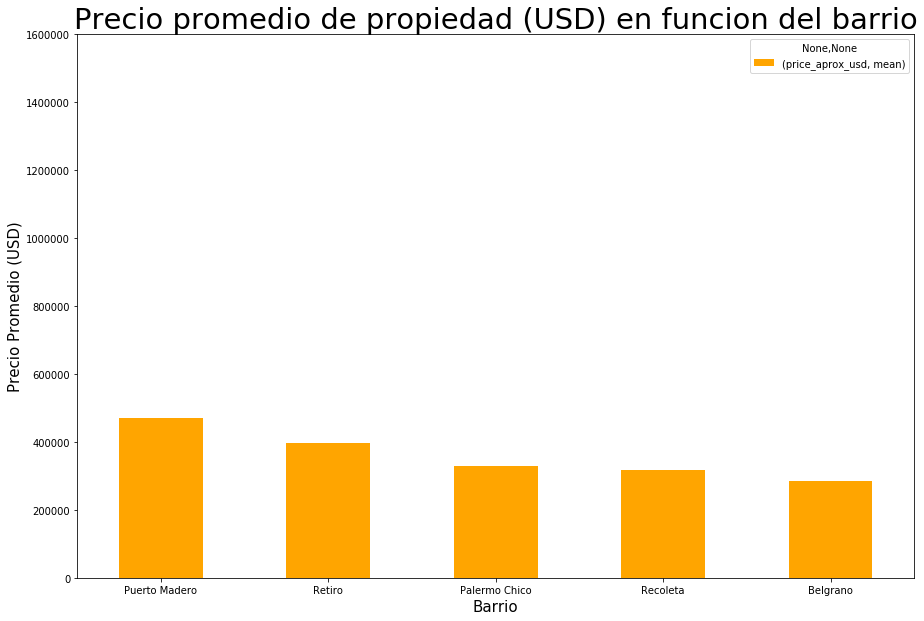

In [5]:
ssem_2014_pr = ssem_2014.loc[(ssem_2014.place_name.str.contains('Palermo Chico') | \
                             ssem_2014.place_name.str.contains('Puerto Madero') | \
                             ssem_2014.place_name.str.contains('Retiro') | \
                             ssem_2014.place_name.str.contains('Recoleta') | \
                             ssem_2014.place_name.str.contains('Belgrano') ) \
                            & (ssem_2014.price_aprox_usd > 0) & ssem_2014.state_name.str.contains('Capital Federal'), \
                             ['place_name', 'price_aprox_usd']]
ssem_2014_pr.dropna(inplace=True)
ssem_2014_pr = ssem_2014_pr.groupby('place_name').agg([np.mean])
ssem_2014_pr = ssem_2014_pr.sort_values(('price_aprox_usd', 'mean'), ascending = False).head(5)
fig1 = ssem_2014_pr.plot(kind='bar', figsize =(15,10), color='orange', rot = 0)
fig1.set_title('Precio promedio de propiedad (USD) en funcion del barrio', size = 29)
fig1.set_xlabel('Barrio', size = 15)
fig1.set_ylabel('Precio Promedio (USD)', size = 15)
fig1.set_ylim(0,1600000)

# Promedio de precios en USD por barrio 1er semestre 2015 segun top 5

(0, 1600000)

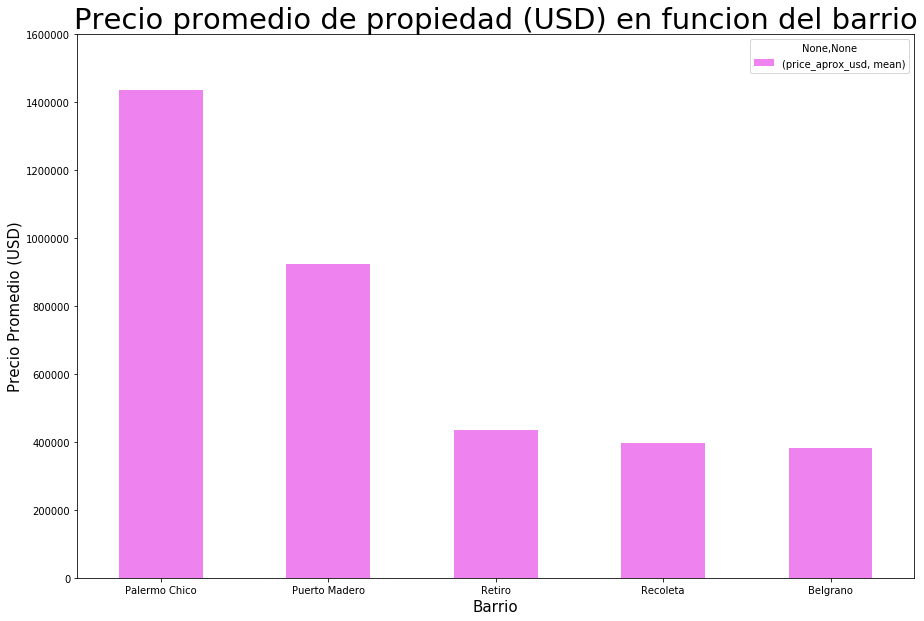

In [6]:
psem_2015_pr = psem_2015.loc[(psem_2015.place_name.str.contains('Palermo Chico') | \
                             psem_2015.place_name.str.contains('Puerto Madero') | \
                             psem_2015.place_name.str.contains('Retiro') | \
                             psem_2015.place_name.str.contains('Recoleta') | \
                             psem_2015.place_name.str.contains('Belgrano') ) \
                             & (psem_2015.price_aprox_usd > 0) & psem_2015.state_name.str.contains('Capital Federal'), \
                             ['place_name', 'price_aprox_usd']]
psem_2015_pr.dropna(inplace=True)
psem_2015_pr = psem_2015_pr.groupby('place_name').agg([np.mean])
psem_2015_pr = psem_2015_pr.sort_values(('price_aprox_usd', 'mean'), ascending = False).head(5)
fig1 = psem_2015_pr.plot(kind='bar', figsize =(15,10), color='violet', rot = 0)
fig1.set_title('Precio promedio de propiedad (USD) en funcion del barrio', size = 29)
fig1.set_xlabel('Barrio', size = 15)
fig1.set_ylabel('Precio Promedio (USD)', size = 15)
fig1.set_ylim(0,1600000)

# Promedio de precios en USD por barrio 2do semestre 2015 segun top 5

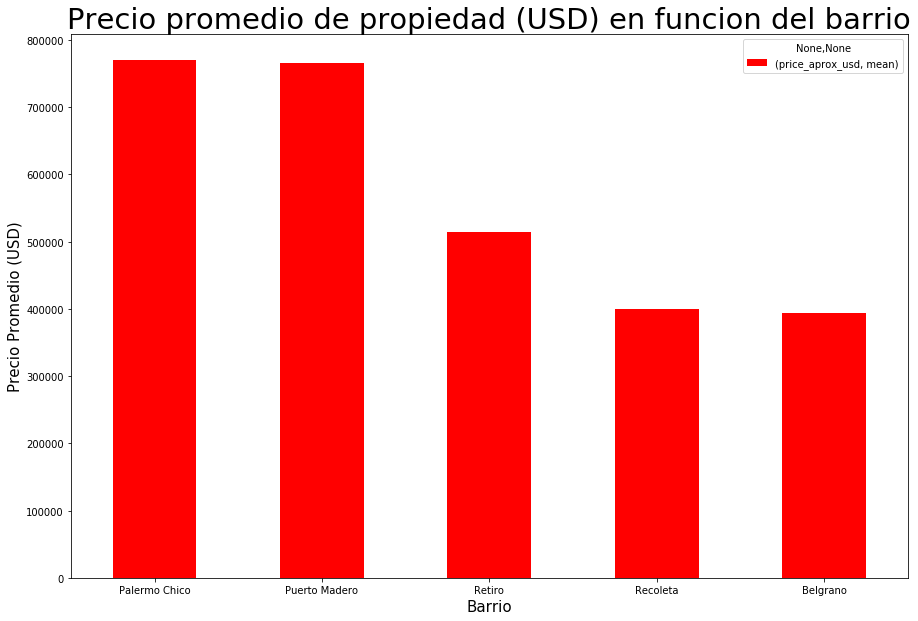

In [7]:
ssem_2015_pr = ssem_2015.loc[(ssem_2015.place_name.str.contains('Palermo Chico') | \
                             ssem_2015.place_name.str.contains('Puerto Madero') | \
                             ssem_2015.place_name.str.contains('Retiro') | \
                             ssem_2015.place_name.str.contains('Recoleta') | \
                             ssem_2015.place_name.str.contains('Belgrano') ) \
                             & (ssem_2015.price_aprox_usd > 0) & ssem_2015.state_name.str.contains('Capital Federal'), \
                             ['place_name', 'price_aprox_usd']]
ssem_2015_pr.dropna(inplace=True)
ssem_2015_pr = ssem_2015_pr.groupby('place_name').agg([np.mean])
ssem_2015_pr = ssem_2015_pr.sort_values(('price_aprox_usd', 'mean'), ascending = False).head(5)
fig1 = ssem_2015_pr.plot(kind='bar', figsize =(15,10), color='r', rot = 0)
fig1.set_title('Precio promedio de propiedad (USD) en funcion del barrio', size = 29)
fig1.set_xlabel('Barrio', size = 15)
fig1.set_ylabel('Precio Promedio (USD)', size = 15)

# Promedio de precios en USD por barrio 1er semestre 2016 segun top 5

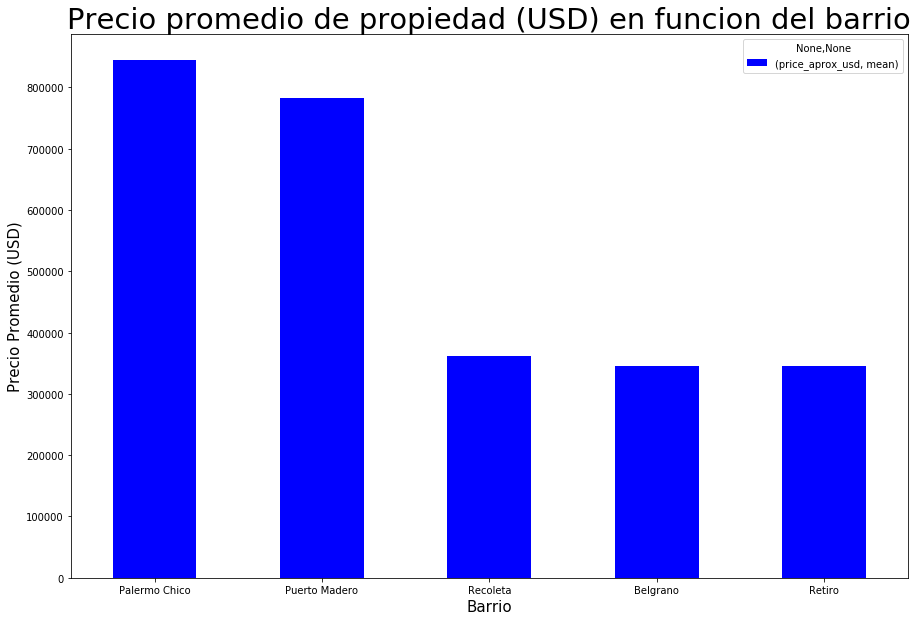

In [8]:
psem_2016_pr = psem_2016.loc[(psem_2016.place_name.str.contains('Palermo Chico') | \
                             psem_2016.place_name.str.contains('Puerto Madero') | \
                             psem_2016.place_name.str.contains('Retiro') | \
                             psem_2016.place_name.str.contains('Recoleta') | \
                             psem_2016.place_name.str.contains('Belgrano') ) \
                             & (psem_2016.price_aprox_usd > 0) & psem_2016.state_name.str.contains('Capital Federal'), \
                             ['place_name', 'price_aprox_usd']]
psem_2016_pr.dropna(inplace=True)
psem_2016_pr = psem_2016_pr.groupby('place_name').agg([np.mean])
psem_2016_pr = psem_2016_pr.sort_values(('price_aprox_usd', 'mean'), ascending = False).head(5)
fig1 = psem_2016_pr.plot(kind='bar', figsize =(15,10), color='b', rot = 0)
fig1.set_title('Precio promedio de propiedad (USD) en funcion del barrio', size = 29)
fig1.set_xlabel('Barrio', size = 15)
fig1.set_ylabel('Precio Promedio (USD)', size = 15)

# Promedio de precio en USD por barrio 2do semestre 2016 segun top 5

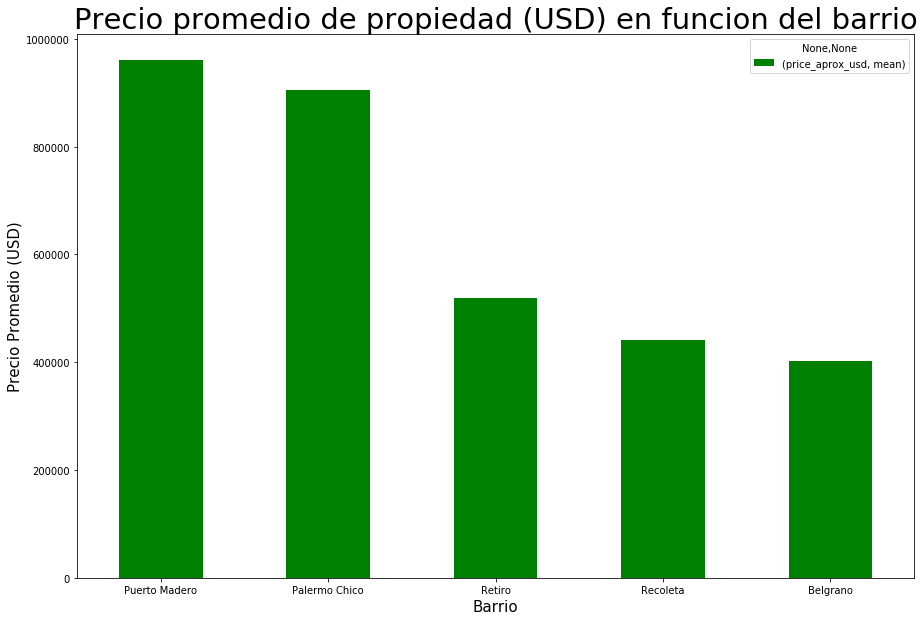

In [9]:
ssem_2016_pr = ssem_2016.loc[(ssem_2016.place_name.str.contains('Palermo Chico') | \
                             ssem_2016.place_name.str.contains('Puerto Madero') | \
                             ssem_2016.place_name.str.contains('Retiro') | \
                             ssem_2016.place_name.str.contains('Recoleta') | \
                             ssem_2016.place_name.str.contains('Belgrano') ) \
                             & (ssem_2016.price_aprox_usd > 0) & ssem_2016.state_name.str.contains('Capital Federal'), \
                             ['place_name', 'price_aprox_usd']]
ssem_2016_pr.dropna(inplace=True)
ssem_2016_pr = ssem_2016_pr.groupby('place_name').agg([np.mean])
ssem_2016_pr = ssem_2016_pr.sort_values(('price_aprox_usd', 'mean'), ascending = False).head(5)
fig1 = ssem_2016_pr.plot(kind='bar', figsize =(15,10), color='g', rot = 0)
fig1.set_title('Precio promedio de propiedad (USD) en funcion del barrio', size = 29)
fig1.set_xlabel('Barrio', size = 15)
fig1.set_ylabel('Precio Promedio (USD)', size = 15)

# Precio en funcion del tipo de propiedad en venta

In [10]:
tipo_prop = semestres.loc[semestres.state_name.str.contains('Capital Federal') & (semestres.place_name.str.contains('Capital Federal') == False) \
                   & (semestres.price_aprox_usd > 0),['property_type', 'price_aprox_usd']]
tipo_prop.dropna(inplace=True)
tipo_prop = tipo_prop.groupby('property_type').agg([np.mean]).sort_values(('price_aprox_usd', 'mean') \
                                                                          , ascending = False).head()
tipo_prop

,price_aprox_usd
,mean
property_type,
house,471972.039377
store,451111.356554
apartment,222896.209953
PH,175045.266389


# ¿En que barrio son mas caras las casas, desde el segundo semestre del 2014 hasta julio del 2017?

In [11]:
casas_pr = semestres.loc[semestres.state_name.str.contains('Capital Federal') & (semestres.place_name.str.contains('Capital Federal') == False) \
                   & (semestres.property_type.str.contains('house')) \
                   & (semestres.price_aprox_usd > 0),['place_name', 'price_aprox_usd']]
casas_pr.dropna(inplace=True)
casas_pr = casas_pr.groupby('place_name').agg([np.mean,np.size])
casas_pr = casas_pr.loc[casas_pr[('price_aprox_usd', 'size')]>100,:].sort_values(('price_aprox_usd', 'mean'), ascending = False).head(5)
casas_pr.drop([('price_aprox_usd', 'size')], axis = 1, inplace=True)
casas_pr

,price_aprox_usd
,mean
place_name,
Belgrano,1.088447e+06
Palermo,7.865573e+05
Villa Devoto,4.267232e+05
Caballito,4.137442e+05
Villa Urquiza,3.904226e+05


# ¿En que barrio son mas caros los departamentos, desde el segundo semestre del 2014 hasta julio del 2017?

In [12]:
deptos_pr = semestres.loc[semestres.state_name.str.contains('Capital Federal') & (semestres.place_name.str.contains('Capital Federal') == False) \
                   & (semestres.property_type.str.contains('apartment')) \
                   & (semestres.price_aprox_usd > 0),['place_name', 'price_aprox_usd']]
deptos_pr.dropna(inplace=True)
deptos_pr = deptos_pr.groupby('place_name').agg([np.mean,np.size])
deptos_pr = deptos_pr.loc[deptos_pr[('price_aprox_usd', 'size')]>100,:].sort_values(('price_aprox_usd', 'mean'), ascending = False).head(5)
deptos_pr.drop([('price_aprox_usd', 'size')], axis = 1, inplace=True)
deptos_pr

,price_aprox_usd
,mean
place_name,
Puerto Madero,878486.281202
Palermo Chico,788957.532966
Recoleta,399035.628085
Retiro,378015.218595
Belgrano,315544.597712


# ¿En que barrio son mas caros los PH, desde el segundo semestre del 2014 hasta julio del 2017? 

In [13]:
ph_pr = semestres.loc[semestres.state_name.str.contains('Capital Federal') & (semestres.place_name.str.contains('Capital Federal') == False) \
                   & (semestres.property_type.str.contains('PH')) \
                   & (semestres.price_aprox_usd > 0),['place_name', 'price_aprox_usd']]
ph_pr.dropna(inplace=True)
ph_pr = ph_pr.groupby('place_name').agg([np.mean,np.size])
ph_pr = ph_pr.loc[ph_pr[('price_aprox_usd', 'size')]>100,:].sort_values(('price_aprox_usd', 'mean'), ascending = False).head(5)
ph_pr.drop([('price_aprox_usd', 'size')], axis = 1, inplace=True)
ph_pr

,price_aprox_usd
,mean
place_name,
Palermo,266492.629474
Belgrano,242242.342342
Caballito,202328.638498
Almagro,193667.525773
Villa Crespo,188174.795350


# ¿En que barrio son mas caros los negocios, desde el segundo semestre del 2014 hasta julio del 2017?

In [14]:
negocios_pr = semestres.loc[semestres.state_name.str.contains('Capital Federal') & (semestres.place_name.str.contains('Capital Federal') == False) \
                   & (semestres.property_type.str.contains('store')) \
                   & (semestres.price_aprox_usd > 0),['place_name', 'price_aprox_usd']]
negocios_pr.dropna(inplace=True)
negocios_pr = negocios_pr.groupby('place_name').agg([np.mean,np.size])
negocios_pr = negocios_pr.loc[negocios_pr[('price_aprox_usd', 'size')]>50,:].sort_values(('price_aprox_usd', 'mean'), ascending = False).head(5)
negocios_pr.drop([('price_aprox_usd', 'size')], axis = 1, inplace=True)
negocios_pr

,price_aprox_usd
,mean
place_name,
San Nicolás,622640.382469
Recoleta,567315.482051
San Telmo,567171.487073
Palermo,557311.293493
Balvanera,538694.138654
